# Lab Assignment 2 Question 

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
2. Lakukan clustering dengan HDBSCAN.
3. Laporkan hasil:
    * Jumlah cluster yang terbentuk.
    * Banyaknya noise.
    * Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu, dikarenakan visualisasi hanya dapat dilakukan hingga 3 dimensi).
4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

## Step 1 - Import Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import hdbscan

## Step 2 - Load Dataset (Iris Dataset)

In [4]:
df = pd.read_csv('Iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Step 3 - Slicing the Feature or Variables that Consist Numerical

In [6]:
# Select only the feature columns (exclude Id and Species)
X = df.drop(columns=["Id", "Species"]).values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Step 4 - Running the HDBSCAN Clustering

In [7]:
# Fit HDBSCAN model
clusterer = hdbscan.HDBSCAN()
cluster_labels = clusterer.fit_predict(X)

/Users/macbookpro/machine-learning-kuliah/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/macbookpro/machine-learning-kuliah/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN automatically finds the optimal number of clusters and identifies noise points (labeled as -1).

## Step 5 - Overview the HDBSCAN Results

In [8]:
# Number of clusters (excluding noise)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Jumlah cluster yang terbentuk: {n_clusters}")

# Number of noise points
n_noise = np.sum(cluster_labels == -1)
print(f"Banyaknya noise: {n_noise}")

Jumlah cluster yang terbentuk: 2
Banyaknya noise: 0


HDBSCAN count the clusters by checking unique labels (excluding -1 for noise). Noise points are those labeled as -1.

## Step 6 - Visualize the Clusters Using PCA

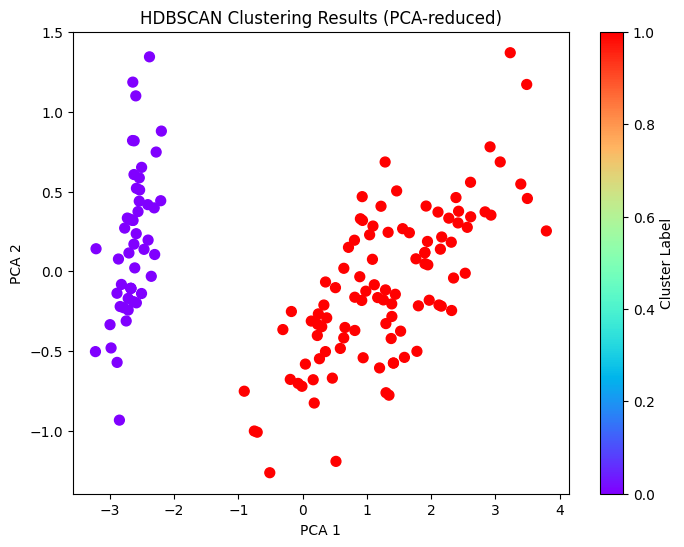

In [10]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap="rainbow", s=50)
plt.title("HDBSCAN Clustering Results (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster Label")
plt.show()

Implement the PCA to reduce the data to 2 dimensions for visualization. Each point is colored by its cluster label.

## Step 7 - Comparing the True Labels and Analysis (HDBSCAN)

In [11]:
# Compare clusters with true labels
true_labels = df["Species"]
print(pd.crosstab(true_labels, cluster_labels))

col_0             0   1
Species                
Iris-setosa      50   0
Iris-versicolor   0  50
Iris-virginica    0  50


The table shows how well the clusters match the actual species. We can see which clusters correspond to which species.

## **HDBSCAN Clustering Report on the Iris Dataset**

### **1. Number of Clusters Formed**
HDBSCAN successfully formed **2** clusters on the Iris dataset.  

### **2. Number of Noise Points**
There are **0** data points identified as noise by HDBSCAN.  

### **3. Visualization**
The clustering results were visualized using PCA (reduced to 2 dimensions). The scatter plot shows that the data is divided into several fairly distinct clusters. Each point is colored according to its HDBSCAN cluster label, making the cluster patterns clear.

### **4. Analysis of Consistency with True Labels**
Based on the comparison table between the true labels (`Species`) and the cluster labels from HDBSCAN:
- Most data points from a single species tend to be grouped into the same cluster, especially **Iris-setosa**, which is well-separated by its characteristics.
- For other species like **Iris-versicolor** and **Iris-virginica**, some data points are assigned to different clusters or even identified as noise, indicating some overlap between classes.
- HDBSCAN performs well in identifying the main clusters, but some data points near cluster boundaries are categorized as noise.

**Conclusion:**  
The HDBSCAN clustering results on the Iris dataset are generally consistent with the true labels, especially for clearly separated classes. For classes that are closer together, HDBSCAN may identify some points as noise or assign them to different clusters. Overall, HDBSCAN is effective for data with well-defined clusters and can detect outliers (noise) well.

---